
<h1 style="text-align: center;">Análise de Dados das Eleições em São Paulo</h1>


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

#Ler dataset do estado de SP
df = pd.read_csv("consulta_cand_2024_SP.csv", encoding='latin-1', sep=';')


In [24]:
#Criar um dataset próprio somente com dados do município de São Paulo
sp_24 = df[df['NM_UE'].str.contains('SÃO PAULO', case=False, na=False)]

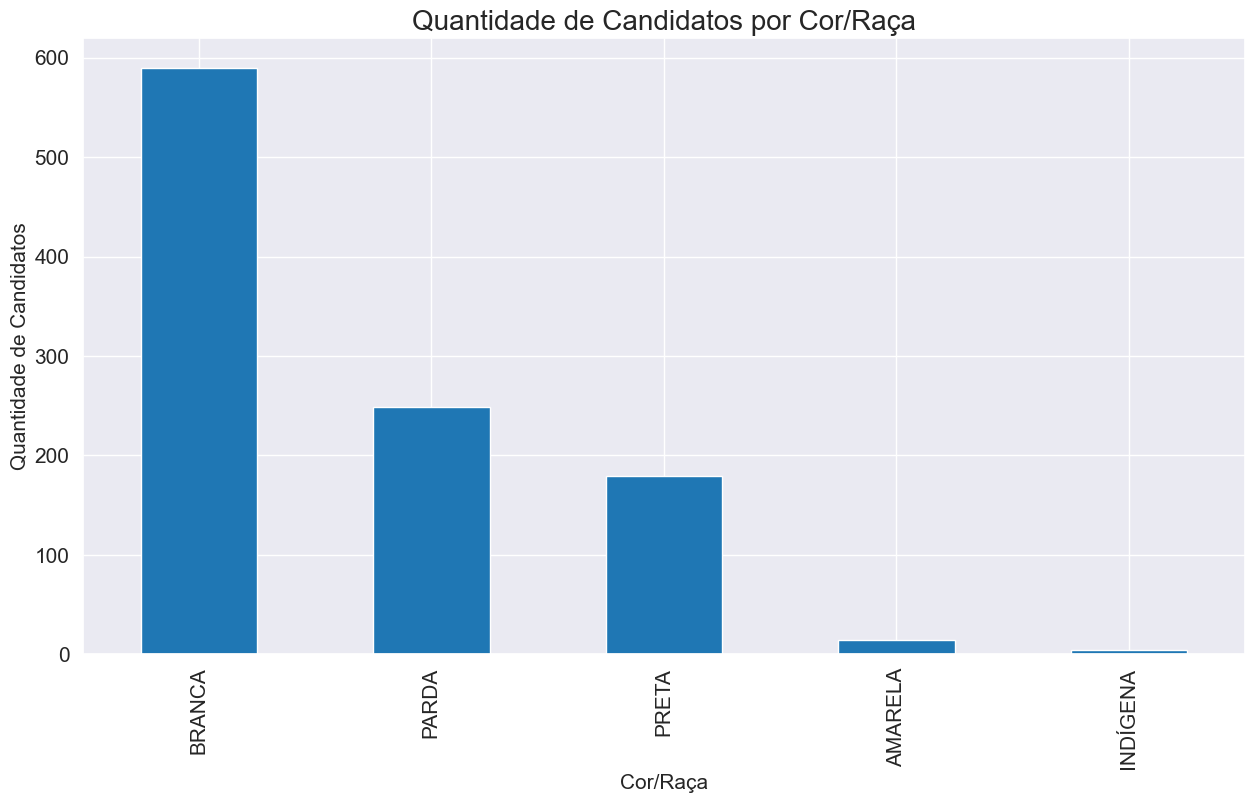

In [25]:
# Gráfico de quantidade de candidatos por cor / raça
plt.title("Quantidade de Candidatos por Cor/Raça", fontsize=20)
sp_24['DS_COR_RACA'].value_counts().plot(kind='bar')
plt.ylabel('Quantidade de Candidatos', fontsize=15)
plt.xlabel('Cor/Raça', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Top 5 partidos com mais candidaturas em SP

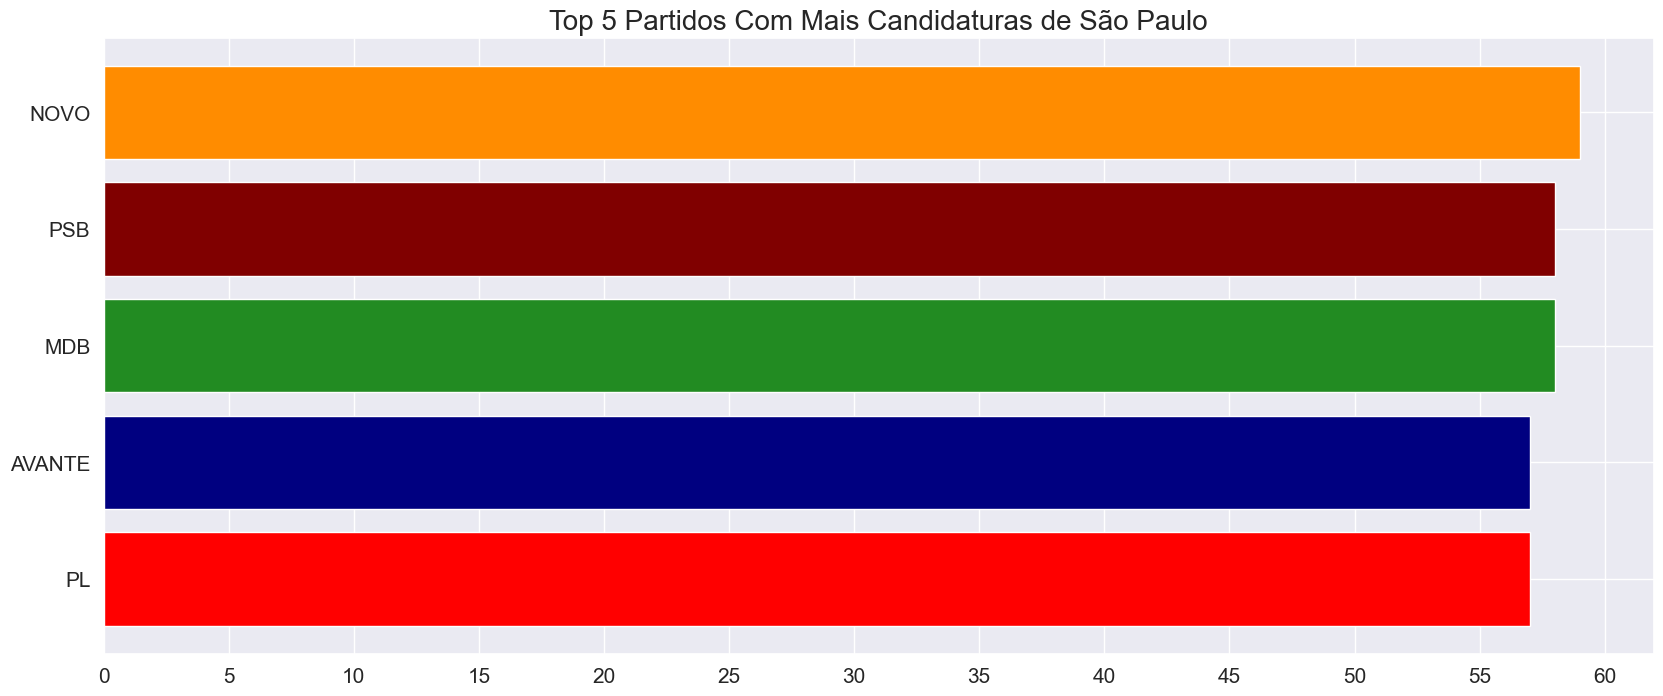

In [26]:
# Gráfico top 5 partidos com mais candidaturas em SP
top_5_partidos = sp_24['SG_PARTIDO'].value_counts().nlargest(5).sort_values(ascending=True)
plt.rcParams['figure.figsize'] = [20, 8]
plt.barh(top_5_partidos.index, top_5_partidos, color=['red', 'navy', 'forestgreen', 'maroon', 'darkorange'])
plt.xticks(range(0, 65, 5), fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 5 Partidos Com Mais Candidaturas de São Paulo", fontsize=20)
plt.show()

### Distribuição Normal da idade dos candidatos

50.504826254826256 11.745159383988375


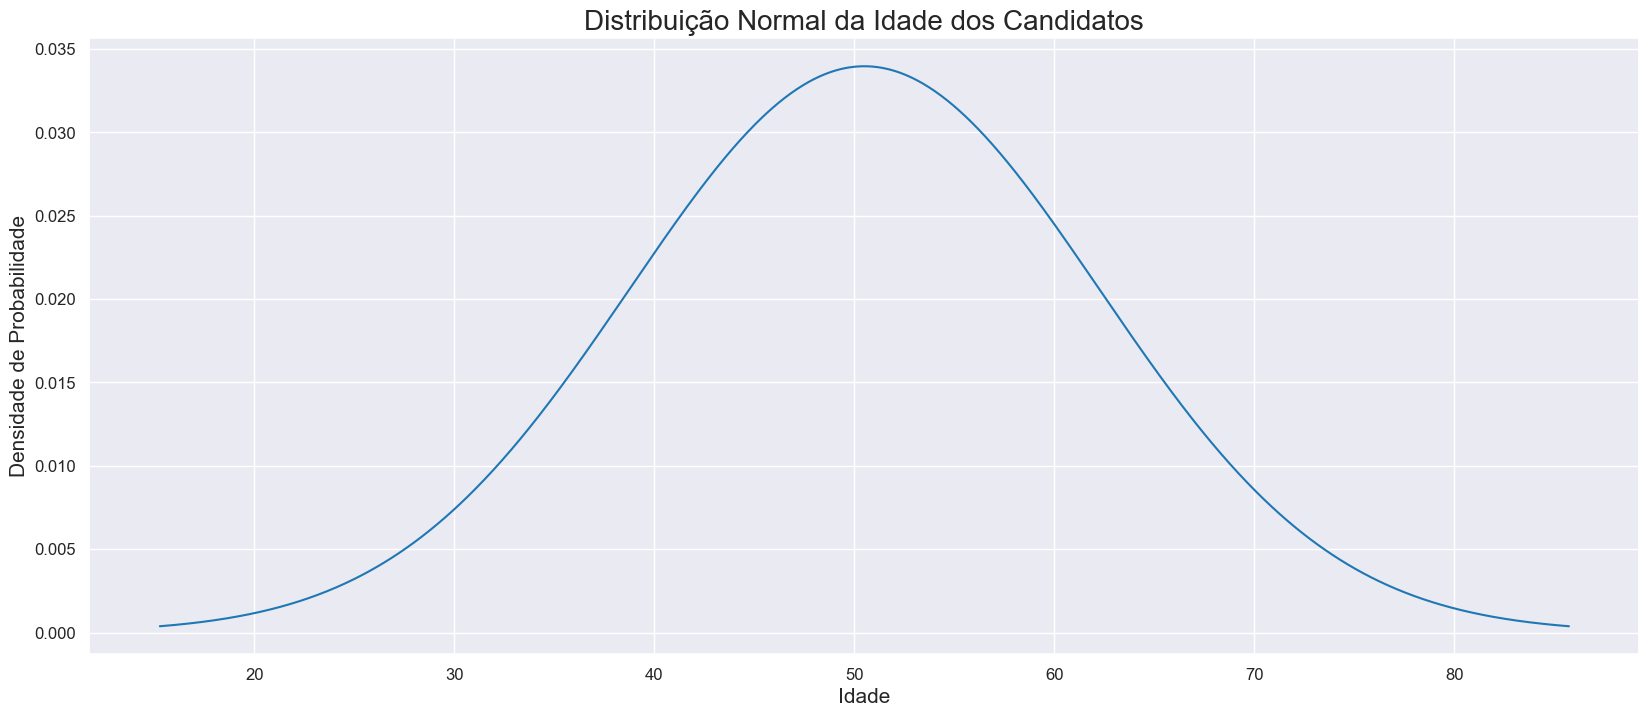

In [27]:
# Distribuição Normal da idade dos candidatos

df_idade = sp_24[sp_24['DT_NASCIMENTO'].notnull()]
df_idade = df_idade.reset_index()
df_idade = df_idade[['DT_NASCIMENTO']]
df_idade['DT_NASCIMENTO'] = pd.to_datetime(df_idade['DT_NASCIMENTO'], dayfirst=True)
df_idade['IDADE'] = 2024 - df_idade['DT_NASCIMENTO'].dt.year
media = df_idade['IDADE'].mean()

desvio_padrao = df_idade['IDADE'].std()

print(media, desvio_padrao)

x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 930)
plt.plot(x, norm.pdf(x, media, desvio_padrao))
plt.title('Distribuição Normal da Idade dos Candidatos', fontsize=20)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Densidade de Probabilidade', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Leitura dos dados de 1996 - 2024

Foi necessário realizar uma limpeza de dados no dataset de cada ano

In [28]:
inv_col_96 = ['NR_TURNO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UE', 'CD_ELEICAO',
            'NM_TIPO_ELEICAO', 'CD_TIPO_ELEICAO', 'DT_GERACAO', 'HH_GERACAO', 'CD_CARGO', 'DS_ELEICAO',
            'SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'CD_SITUACAO_CANDIDATURA',
            'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
            'ST_REELEICAO', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO', 'ST_CANDIDATO_INSERIDO_URNA',
            'DS_SITUACAO_CANDIDATO_URNA', 'CD_SITUACAO_CANDIDATO_URNA', 'DS_SITUACAO_CANDIDATO_PLEITO',
            'CD_SITUACAO_CANDIDATO_PLEITO', 'CD_SIT_TOT_TURNO', 'CD_OCUPACAO', 'DS_ESTADO_CIVIL', 'CD_ESTADO_CIVIL',
            'CD_GRAU_INSTRUCAO', 'CD_GENERO', 'NR_TITULO_ELEITORAL_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'NM_MUNICIPIO_NASCIMENTO',
            'CD_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'DS_NACIONALIDADE', 'CD_COR_RACA', 'CD_NACIONALIDADE',
            'DS_COMPOSICAO_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'SQ_COLIGACAO', 'NM_PARTIDO', 'NR_PARTIDO', 'NR_CANDIDATO']
sp_96 = pd.read_csv('consulta_cand_1996_SP.csv', encoding='latin-1', sep=';')
sp_96 = sp_96[sp_96['NM_UE'] == 'SAO PAULO'].drop(columns=inv_col_96)

inv_col_00 = ['NR_TURNO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UE', 'CD_ELEICAO',
            'NM_TIPO_ELEICAO', 'CD_TIPO_ELEICAO', 'DT_GERACAO', 'HH_GERACAO', 'CD_CARGO', 'DS_ELEICAO',
            'SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'CD_SITUACAO_CANDIDATURA',
            'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
            'ST_REELEICAO', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO', 'ST_CANDIDATO_INSERIDO_URNA',
            'DS_SITUACAO_CANDIDATO_URNA', 'CD_SITUACAO_CANDIDATO_URNA', 'DS_SITUACAO_CANDIDATO_PLEITO',
            'CD_SITUACAO_CANDIDATO_PLEITO', 'CD_SIT_TOT_TURNO', 'CD_OCUPACAO', 'DS_ESTADO_CIVIL', 'CD_ESTADO_CIVIL',
            'CD_GRAU_INSTRUCAO', 'CD_GENERO', 'NR_TITULO_ELEITORAL_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'NM_MUNICIPIO_NASCIMENTO',
            'CD_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'DS_NACIONALIDADE', 'CD_COR_RACA', 'CD_NACIONALIDADE',
            'DS_COMPOSICAO_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'SQ_COLIGACAO', 'NM_PARTIDO', 'NR_PARTIDO',
            'CD_SITUACAO_CANDIDATO_TOT', 'NM_TIPO_DESTINACAO_VOTOS', 'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
            'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA']
sp_00 = pd.read_csv('consulta_cand_2000_SP.csv', encoding='latin-1', sep=';')
sp_00 = sp_00[sp_00['NM_UE'] == 'SAO PAULO'].drop(columns=inv_col_00)

sp_04 = pd.read_csv('consulta_cand_2004_SP.csv', encoding='latin-1', sep=';')
sp_04 = sp_04[sp_04['NM_UE'] == 'SAO PAULO'].drop(columns=inv_col_96)

sp_08 = pd.read_csv('consulta_cand_2008_SP.csv', encoding='latin-1', sep=';')
sp_08 = sp_08[sp_08['NM_UE'] == 'SÃO PAULO'].drop(columns=inv_col_96)

sp_12 = pd.read_csv('consulta_cand_2012_SP.csv', encoding='latin-1', sep=';')
sp_12 = sp_12[sp_12['NM_UE'].str.contains('SÃO PAULO')].drop(columns=inv_col_96)

inv_col_16 = ['NR_TURNO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UE', 'CD_ELEICAO',
            'NM_TIPO_ELEICAO', 'CD_TIPO_ELEICAO', 'DT_GERACAO', 'HH_GERACAO', 'CD_CARGO', 'DS_ELEICAO',
            'SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'CD_SITUACAO_CANDIDATURA',
            'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
            'ST_REELEICAO', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO', 'ST_CANDIDATO_INSERIDO_URNA',
            'DS_SITUACAO_CANDIDATO_URNA', 'CD_SITUACAO_CANDIDATO_URNA', 'DS_SITUACAO_CANDIDATO_PLEITO',
            'CD_SITUACAO_CANDIDATO_PLEITO', 'CD_SIT_TOT_TURNO', 'CD_OCUPACAO', 'DS_ESTADO_CIVIL', 'CD_ESTADO_CIVIL',
            'CD_GRAU_INSTRUCAO', 'CD_GENERO', 'NR_TITULO_ELEITORAL_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'NM_MUNICIPIO_NASCIMENTO',
            'CD_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'DS_NACIONALIDADE', 'CD_COR_RACA', 'CD_NACIONALIDADE',
            'DS_COMPOSICAO_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'SQ_COLIGACAO', 'NM_PARTIDO', 'NR_PARTIDO',
            'CD_SITUACAO_CANDIDATO_TOT', 'NM_TIPO_DESTINACAO_VOTOS', 'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
            'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA', 'NR_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO']
sp_16 = pd.read_csv('consulta_cand_2016_SP.csv', encoding='latin-1', sep=';')
sp_16 = sp_16[sp_16['NM_UE'].str.contains('SÃO PAULO')].drop(columns=inv_col_16)

inv_col_20 = ['NR_TURNO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UE', 'CD_ELEICAO',
      'NM_TIPO_ELEICAO', 'CD_TIPO_ELEICAO', 'DT_GERACAO', 'HH_GERACAO', 'CD_CARGO', 'DS_ELEICAO',
      'SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'CD_SITUACAO_CANDIDATURA',
      'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
      'ST_REELEICAO', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO', 'ST_CANDIDATO_INSERIDO_URNA',
      'DS_SITUACAO_CANDIDATO_URNA', 'CD_SITUACAO_CANDIDATO_URNA', 'DS_SITUACAO_CANDIDATO_PLEITO',
      'CD_SITUACAO_CANDIDATO_PLEITO', 'CD_SIT_TOT_TURNO', 'CD_OCUPACAO', 'DS_ESTADO_CIVIL', 'CD_ESTADO_CIVIL',
      'CD_GRAU_INSTRUCAO', 'CD_GENERO', 'NR_TITULO_ELEITORAL_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'NM_MUNICIPIO_NASCIMENTO',
      'CD_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'DS_NACIONALIDADE', 'CD_COR_RACA', 'CD_NACIONALIDADE',
      'DS_COMPOSICAO_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'SQ_COLIGACAO', 'NM_PARTIDO', 'NR_PARTIDO',
      'CD_SITUACAO_CANDIDATO_TOT', 'NM_TIPO_DESTINACAO_VOTOS', 'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS', 'NR_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO']
sp_20 = pd.read_csv('consulta_cand_2020_SP.csv', encoding='latin-1', sep=';')
sp_20 = sp_20[sp_20['NM_UE'].str.contains('SÃO PAULO')].drop(columns=[col for col in inv_col_20 if col in sp_20.columns])



C:\Users\Beatriz\AppData\Local\Temp\ipykernel_14600\3280492561.py:26: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_00 = pd.read_csv('consulta_cand_2000_SP.csv', encoding='latin-1', sep=';')


In [29]:
#Juntar todos os datasets
sp = pd.concat([sp_96, sp_00, sp_04, sp_08, sp_12, sp_16, sp_20, sp_24]).drop(columns=['VR_DESPESA_MAX_CAMPANHA', 'ST_DECLARAR_BENS',
                                                                                       'NR_CANDIDATO', 'NM_FEDERACAO', 'DS_EMAIL'])
sp_partidos = pd.crosstab(sp['ANO_ELEICAO'], sp['SG_PARTIDO']).reset_index()
sp_partidos 

SG_PARTIDO,ANO_ELEICAO,AGIR,AVANTE,CIDADANIA,DC,DEM,MDB,MOBILIZA,NOVO,PAN,...,PTB,PTC,PTN,PV,REDE,REPUBLICANOS,SD,SOLIDARIEDADE,UNIÃO,UP
0,1996,0,0,0,0,0,0,0,0,1,...,59,0,18,2,0,0,0,0,0,0
1,2000,0,0,0,0,0,0,0,0,10,...,87,0,36,77,0,0,0,0,0,0
2,2004,0,0,0,0,0,0,0,0,7,...,46,10,13,85,0,0,0,0,0,0
3,2008,0,0,0,0,36,0,0,0,0,...,90,27,79,86,0,0,0,0,0,0
4,2012,0,0,0,0,14,0,0,0,0,...,73,16,75,89,0,0,0,0,0,0
5,2016,0,0,0,0,15,0,0,45,0,...,85,26,90,83,18,0,67,0,0,0
6,2020,0,86,56,52,62,85,0,36,0,...,84,78,0,75,38,85,0,78,0,4
7,2024,12,57,7,43,0,58,40,59,0,...,0,0,0,6,8,47,0,56,46,8


In [30]:
#Criar um dataset com a quantidade de candidatos de partidos de esquerda e direita
partidos_esquerda = ['ANO_ELEICAO', 'PT', 'PSB', 'PDT', 'PCO', 'PSOL', 'PSTU', 'PC do B', 'UP', 'REDE', 'PV']
partidos_direita = ['ANO_ELEICAO', 'PP', 'PPB', 'PSDB', 'UNIÃO', 'PRB', 'REPUBLICANOS', 'PSL', 'PL', 'PRONA', 'NOVO', 'PFL', 'DEM', 'PSC', 'PRTB', 'PATRIOTA', 'PRD']
sp_partidos_esquerda = sp_partidos[partidos_esquerda].copy()

for i in sp_partidos_esquerda.index:
    sp_partidos_esquerda.loc[i, 'TOTAL'] = sp_partidos_esquerda.loc[i, partidos_esquerda[1:]].sum()

sp_partidos_direita = sp_partidos[partidos_direita].copy()

for i in sp_partidos_esquerda.index:
    sp_partidos_direita.loc[i, 'TOTAL'] = sp_partidos_direita.loc[i, partidos_direita[1:]].sum()

sp_partidos_esquerda_total = sp_partidos_esquerda[['ANO_ELEICAO', 'TOTAL']].copy()

sp_partidos_esquerda_total.rename(columns={'TOTAL' : 'TOTAL_ESQUERDA'}, inplace=True)

sp_partidos_direita_total = sp_partidos_direita[['ANO_ELEICAO', 'TOTAL']].copy()

sp_partidos_direita_total.rename(columns={'TOTAL' : 'TOTAL_DIREITA'}, inplace=True)

sp_partidos_total = pd.merge(sp_partidos_esquerda_total, sp_partidos_direita_total, how='inner', on='ANO_ELEICAO')

sp_partidos_total

SG_PARTIDO,ANO_ELEICAO,TOTAL_ESQUERDA,TOTAL_DIREITA
0,1996,143.0,311.0
1,2000,278.0,398.0
2,2004,375.0,484.0
3,2008,330.0,366.0
4,2012,451.0,171.0
5,2016,314.0,372.0
6,2020,544.0,686.0
7,2024,257.0,406.0


### Número de candidatos por posicionamento político (1996 - 2024)

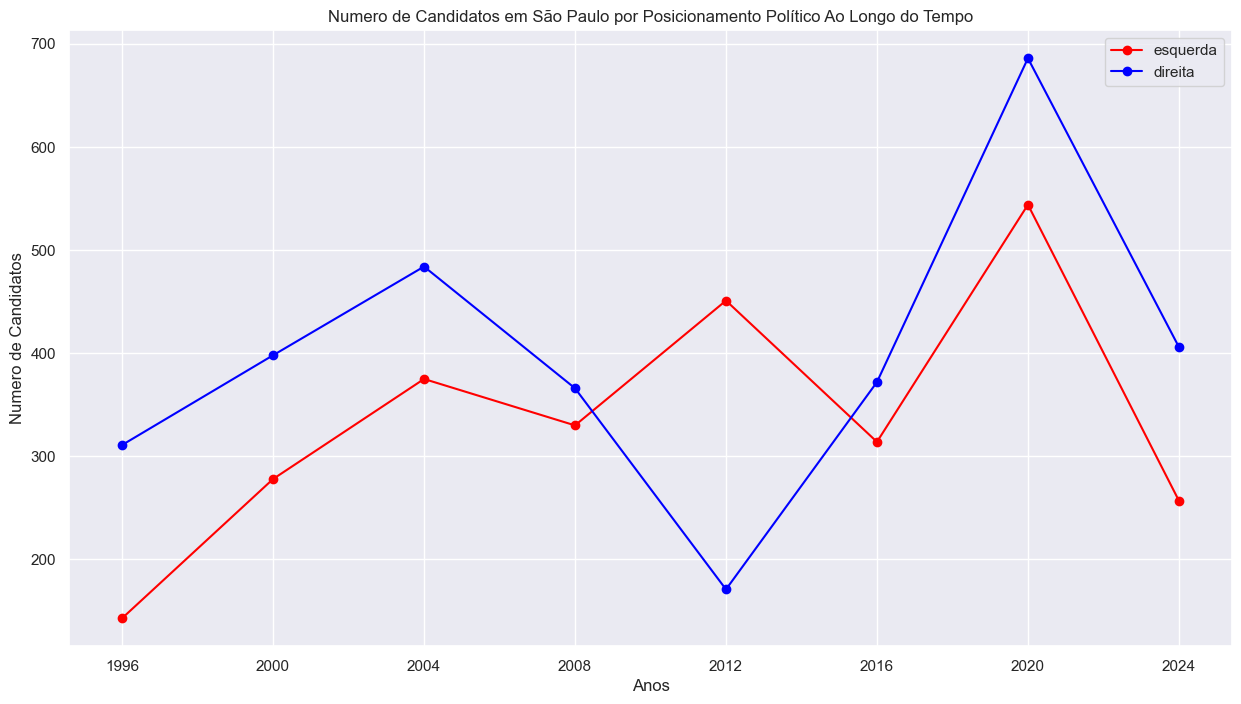

In [31]:
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]
esq, = plt.plot(sp_partidos['ANO_ELEICAO'], sp_partidos_esquerda['TOTAL'], color='red', marker='o')
dir, = plt.plot(sp_partidos['ANO_ELEICAO'], sp_partidos_direita['TOTAL'], color='blue', marker='o')
plt.xlabel("Anos")
plt.ylabel("Numero de Candidatos")
plt.legend([esq, dir], ['esquerda', 'direita'])
plt.xticks(sp_partidos['ANO_ELEICAO'])
plt.title('Numero de Candidatos em São Paulo por Posicionamento Político Ao Longo do Tempo')
plt.show()

### Número de eleitos por posicionamento político ao longo do tempo (1996-2024)

In [32]:
sp_96_eleitos = sp_96[sp_96['DS_SIT_TOT_TURNO'].str.contains('ELEITO') & (sp_96['DS_SIT_TOT_TURNO'] != 'NAO ELEITO') | (sp_96['DS_SIT_TOT_TURNO'] == '2º TURNO') | (sp_96['DS_SIT_TOT_TURNO'] == 'MEDIA')]
sp_00_eleitos = sp_00[sp_00['DS_SIT_TOT_TURNO'].str.contains('ELEITO') & (sp_00['DS_SIT_TOT_TURNO'] != 'NÃO ELEITO') | (sp_00['DS_SIT_TOT_TURNO'] == '2º TURNO') | (sp_00['DS_SIT_TOT_TURNO'] == 'MEDIA')]
sp_04_eleitos = sp_04[sp_04['DS_SIT_TOT_TURNO'].str.contains('ELEITO') & (sp_04['DS_SIT_TOT_TURNO'] != 'NÃO ELEITO') | (sp_04['DS_SIT_TOT_TURNO'] == '2º TURNO') | (sp_04['DS_SIT_TOT_TURNO'] == 'MEDIA')]
sp_08_eleitos = sp_08[sp_08['DS_SIT_TOT_TURNO'].str.contains('ELEITO') & (sp_08['DS_SIT_TOT_TURNO'] != 'NÃO ELEITO') | (sp_08['DS_SIT_TOT_TURNO'] == '2º TURNO') | (sp_08['DS_SIT_TOT_TURNO'] == 'MEDIA')]
sp_12_eleitos = sp_12[sp_12['DS_SIT_TOT_TURNO'].str.contains('ELEITO') & (sp_12['DS_SIT_TOT_TURNO'] != 'NÃO ELEITO') | (sp_12['DS_SIT_TOT_TURNO'] == '2º TURNO') | (sp_12['DS_SIT_TOT_TURNO'] == 'MEDIA')]
sp_16_eleitos = sp_16[sp_16['DS_SIT_TOT_TURNO'].str.contains('ELEITO') & (sp_16['DS_SIT_TOT_TURNO'] != 'NÃO ELEITO') | (sp_16['DS_SIT_TOT_TURNO'] == '2º TURNO') | (sp_16['DS_SIT_TOT_TURNO'] == 'MEDIA')]
sp_20_eleitos = sp_20[sp_20['DS_SIT_TOT_TURNO'].str.contains('ELEITO') & (sp_20['DS_SIT_TOT_TURNO'] != 'NÃO ELEITO') | (sp_20['DS_SIT_TOT_TURNO'] == '2º TURNO') | (sp_20['DS_SIT_TOT_TURNO'] == 'MEDIA')]

sp_eleitos = pd.concat([sp_96_eleitos, sp_00_eleitos, sp_04_eleitos, sp_08_eleitos, sp_12_eleitos, sp_16_eleitos, sp_20_eleitos]).drop(columns=['VR_DESPESA_MAX_CAMPANHA', 'ST_DECLARAR_BENS',
                                                                                       'NR_CANDIDATO', 'NM_FEDERACAO'])
sp_eleitos = pd.crosstab(sp_eleitos['ANO_ELEICAO'], sp_eleitos['SG_PARTIDO']).reset_index()

esq_eleitos = [p for p in partidos_esquerda if p in sp_eleitos]
dir_eleitos = [p for p in partidos_direita if p in sp_eleitos]
sp_eleitos_esquerda = sp_eleitos[esq_eleitos].copy()
sp_eleitos_direita = sp_eleitos[dir_eleitos].copy()

for i in sp_eleitos_esquerda.index:
    sp_eleitos_esquerda.loc[i, 'TOTAL'] = sp_eleitos_esquerda.loc[i, esq_eleitos[1:]].sum()

for i in sp_eleitos_direita.index:
    sp_eleitos_direita.loc[i, 'TOTAL'] = sp_eleitos_direita.loc[i, dir_eleitos[1:]].sum()

esq_eleitos_total = sp_eleitos_esquerda[['ANO_ELEICAO', 'TOTAL']].copy().rename(columns={'TOTAL' : 'TOTAL_ESQUERDA'})
dir_eleitos_total = sp_eleitos_direita[['ANO_ELEICAO', 'TOTAL']].copy().rename(columns={'TOTAL' : 'TOTAL_DIREITA'})



eleitos_total = pd.merge(esq_eleitos_total, dir_eleitos_total, how='inner', on='ANO_ELEICAO')

eleitos_total

SG_PARTIDO,ANO_ELEICAO,TOTAL_ESQUERDA,TOTAL_DIREITA
0,1996,13.0,35.0
1,2000,25.0,21.0
2,2004,18.0,20.0
3,2008,19.0,22.0
4,2012,24.0,16.0
5,2016,16.0,24.0
6,2020,19.0,29.0


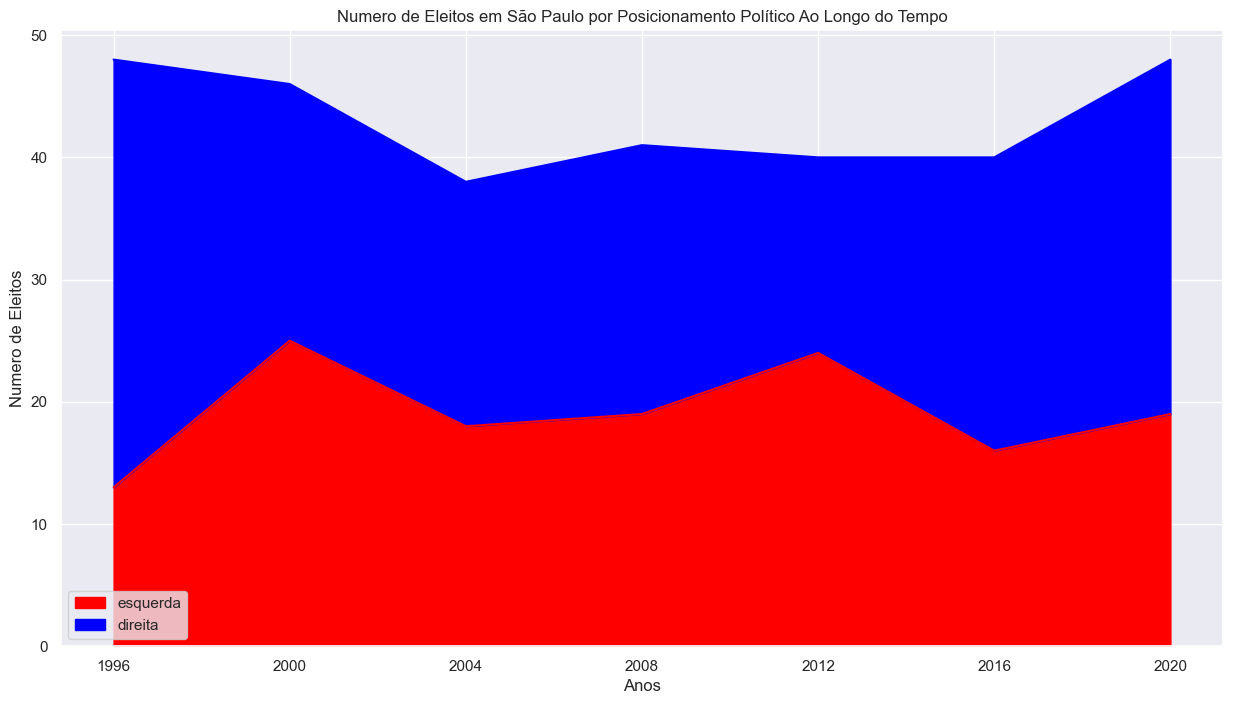

In [33]:
# Gráfico de quantidade de eleitos ao longo do tempo
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

g = eleitos_total.plot(kind='area', x='ANO_ELEICAO', y=['TOTAL_ESQUERDA', 'TOTAL_DIREITA'], color=['red', 'blue'])

handles, labels = g.get_legend_handles_labels()
plt.xlabel("Anos")
plt.ylabel("Numero de Eleitos")
plt.legend(handles, ['esquerda', 'direita'])
plt.xticks(eleitos_total['ANO_ELEICAO'])
plt.title('Numero de Eleitos em São Paulo por Posicionamento Político Ao Longo do Tempo')
plt.show()

### Divisão de cor / raça por posicionamento político

In [34]:
partidos_esquerda[0] = 'DS_COR_RACA'
partidos_direita[0] = 'DS_COR_RACA'
sp_cor_raca = pd.crosstab(sp_24['DS_COR_RACA'], sp_24['SG_PARTIDO']).reset_index()
esquerda_cor_raca = sp_cor_raca[partidos_esquerda].copy()
for i in esquerda_cor_raca.index:
    esquerda_cor_raca.loc[i, 'TOTAL'] = esquerda_cor_raca.loc[i, partidos_esquerda[1:]].sum()

partidos_direita_2024 = [p for p in partidos_direita if p in sp_cor_raca]

direita_cor_raca = sp_cor_raca[partidos_direita_2024].copy()
for i in direita_cor_raca.index:
    direita_cor_raca.loc[i, 'TOTAL'] = direita_cor_raca.loc[i, partidos_direita_2024[1:]].sum()

sp_cor_raca

SG_PARTIDO,DS_COR_RACA,AGIR,AVANTE,CIDADANIA,DC,MDB,MOBILIZA,NOVO,PC do B,PCB,...,PSDB,PSOL,PSTU,PT,PV,REDE,REPUBLICANOS,SOLIDARIEDADE,UNIÃO,UP
0,AMARELA,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,1,2,0
1,BRANCA,6,26,5,23,32,23,39,0,1,...,43,13,4,25,4,5,28,33,24,5
2,INDÍGENA,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,PARDA,2,16,1,16,13,13,15,0,0,...,6,14,2,11,0,0,9,12,13,1
4,PRETA,4,15,1,4,13,4,4,2,1,...,2,21,1,13,2,3,6,10,7,2


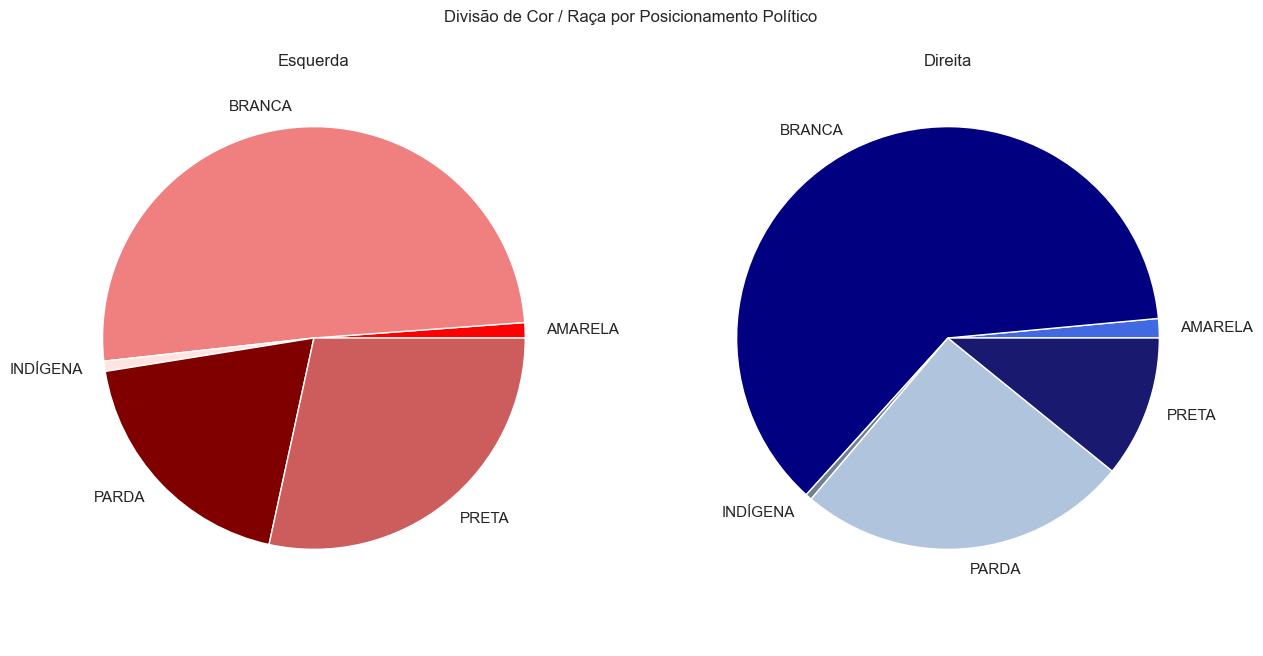

In [35]:
plt.title("Divisão de Cor / Raça por Posicionamento Político")
plt.axis('off')
plt.subplot(1, 2, 1)
plt.pie(esquerda_cor_raca['TOTAL'], labels=esquerda_cor_raca['DS_COR_RACA'], colors=['red', 'lightcoral', 'mistyrose', 'maroon', 'indianred'])
plt.title("Esquerda")

plt.subplot(1, 2, 2)
plt.pie(direita_cor_raca['TOTAL'], labels=direita_cor_raca['DS_COR_RACA'], colors=['royalblue', 'navy', 'slategray', 'lightsteelblue', 'midnightblue'])
plt.title("Direita")
plt.show()

### Divisão de gênero por posicionamento político

In [36]:
partidos_esquerda[0] = 'DS_GENERO'
partidos_direita[0] = 'DS_GENERO'
sp_genero = pd.crosstab(sp_24['DS_GENERO'], sp_24['SG_PARTIDO']).reset_index()
esquerda_genero = sp_genero[partidos_esquerda].copy()
for i in esquerda_genero.index:
    esquerda_genero.loc[i, 'TOTAL'] = esquerda_genero.loc[i, partidos_esquerda[1:]].sum()

partidos_direita_2024 = [p for p in partidos_direita if p in sp_cor_raca or p == 'DS_GENERO']

direita_genero = sp_genero[partidos_direita_2024].copy()
for i in direita_genero.index:
    direita_genero.loc[i, 'TOTAL'] = direita_genero.loc[i, partidos_direita_2024[1:]].sum()

sp_genero

SG_PARTIDO,DS_GENERO,AGIR,AVANTE,CIDADANIA,DC,MDB,MOBILIZA,NOVO,PC do B,PCB,...,PSDB,PSOL,PSTU,PT,PV,REDE,REPUBLICANOS,SOLIDARIEDADE,UNIÃO,UP
0,FEMININO,3,18,4,14,20,13,19,1,1,...,16,18,5,16,3,5,18,17,16,4
1,MASCULINO,9,39,3,29,38,27,40,1,1,...,35,31,3,33,3,3,29,39,30,4


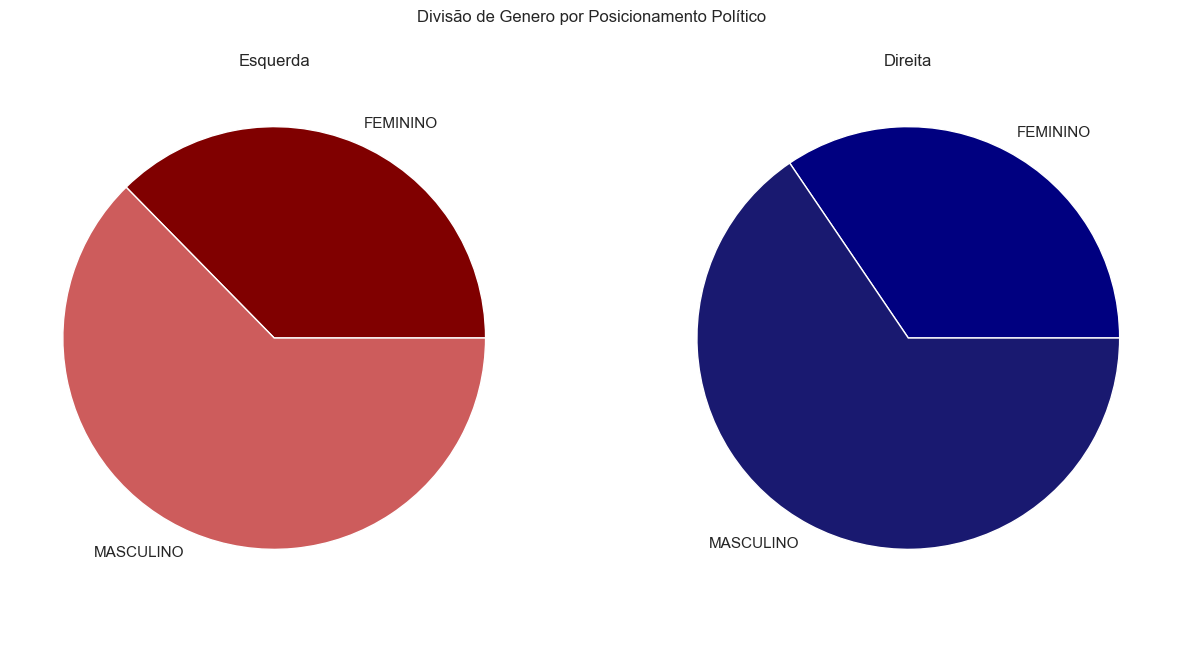

In [37]:
plt.title("Divisão de Genero por Posicionamento Político")
plt.axis('off')
plt.subplot(1, 2, 1)
plt.pie(esquerda_genero['TOTAL'], labels=esquerda_genero['DS_GENERO'], colors=['maroon', 'indianred'])
plt.title("Esquerda")

plt.subplot(1, 2, 2)
plt.pie(direita_genero['TOTAL'], labels=direita_genero['DS_GENERO'], colors=['navy', 'midnightblue'])
plt.title("Direita")
plt.show()

### Top 10 candidatos com maior patrimônio

In [38]:
df_sp = df[df['NM_UE'].str.contains('SÃO PAULO', case=False, na=False)]
df_bens = pd.read_csv('bem_candidato_2024_SP.csv', encoding='latin-1', sep=';')
df_bens = df_bens[df_bens['NM_UE'].str.contains('SÃO PAULO', case=False, na=False)]
df_merged = pd.merge(df_sp, df_bens, on='SQ_CANDIDATO')
df_merged['VR_BEM_CANDIDATO'] = df_merged['VR_BEM_CANDIDATO'].str.replace(',', '.').str.replace('R\$ ', '').astype(float)
df_merged['VR_BEM_CANDIDATO'] = df_merged['VR_BEM_CANDIDATO'].apply(lambda x: f"R$ {x:,.2f}")

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Beatriz\AppData\Local\Temp\ipykernel_14600\4067786650.py:5: SyntaxWarning: invalid escape sequence '\$'
  df_merged['VR_BEM_CANDIDATO'] = df_merged['VR_BEM_CANDIDATO'].str.replace(',', '.').str.replace('R\$ ', '').astype(float)


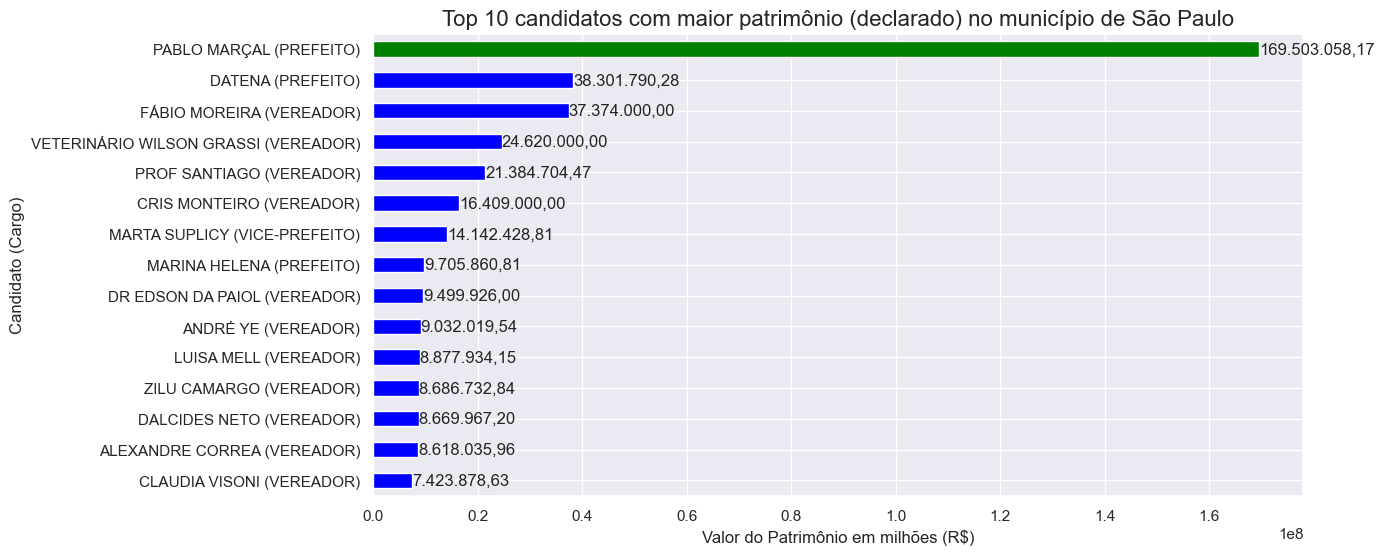

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df_merged = pd.merge(df_sp, df_bens, on='SQ_CANDIDATO')
df_merged['VR_BEM_CANDIDATO'] = df_merged['VR_BEM_CANDIDATO'].str.replace(',', '.').str.replace(r'R\$ ', '').astype(float)

# Agrupar e somar os valores dos bens por candidato
df_bens_agrupados = df_merged.groupby('NM_URNA_CANDIDATO')['VR_BEM_CANDIDATO'].sum()
df_bens_agrupados = df_bens_agrupados.sort_values(ascending=False)
df_bens_top10 = df_bens_agrupados.head(10)

df_bens_top10 = df_merged.groupby(['NM_URNA_CANDIDATO', 'DS_CARGO'])['VR_BEM_CANDIDATO'].sum().sort_values(ascending=False).head(15)
df_bens_top10.index = df_bens_top10.index.map(lambda x: f"{x[0]} ({x[1]})")

plt.figure(figsize=(12, 6))
ax = df_bens_top10.sort_values(ascending=True).plot(kind='barh', color=['blue' for i in range(14)] + ['green'])

plt.title('Top 10 candidatos com maior patrimônio (declarado) no município de São Paulo', fontsize=16)
plt.xlabel('Valor do Patrimônio em milhões (R$)', fontsize=12)
plt.ylabel('Candidato (Cargo)', fontsize=12)

# Função personalizada para formatar os rótulos
def format_currency(x, pos):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Adicionar rótulos formatados como moeda
for container in ax.containers:
    ax.bar_label(container, labels=[format_currency(x, None) for x in container.datavalues], label_type='edge')

plt.show()

### Top 15 partidos com maior patrimônio

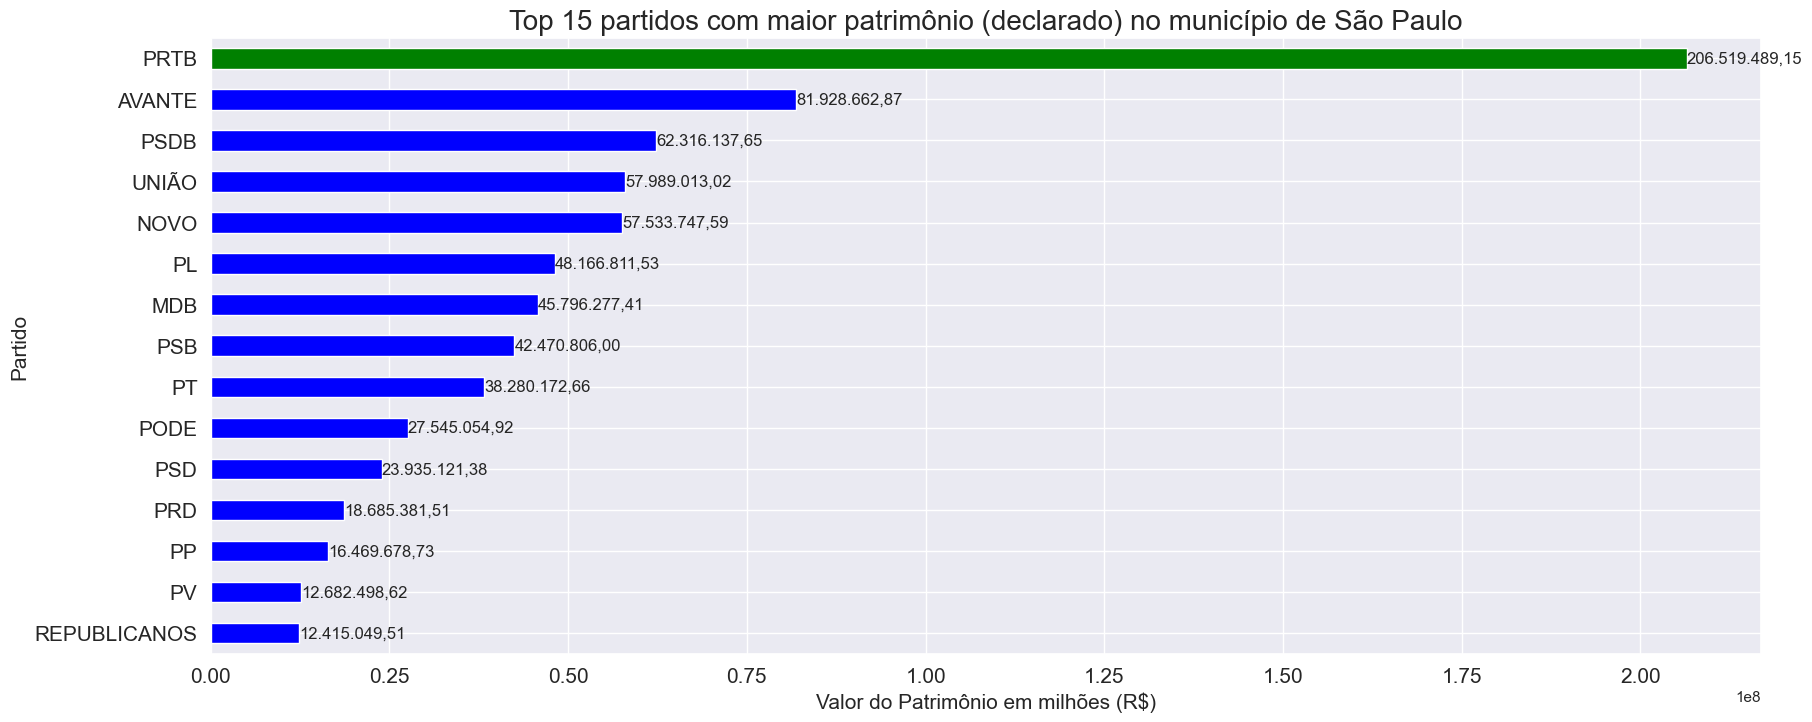

In [40]:
df_merged = pd.merge(df_sp, df_bens, on='SQ_CANDIDATO')
df_merged['VR_BEM_CANDIDATO'] = df_merged['VR_BEM_CANDIDATO'].str.replace(',', '.').str.replace(r'R\$ ', '').astype(float)

df_bens_agrupados = df_merged.groupby('SG_PARTIDO')['VR_BEM_CANDIDATO'].sum()
df_bens_agrupados = df_bens_agrupados.sort_values(ascending=False)

df_bens_top15_partido = df_bens_agrupados.head(15)
df_bens_top15 = df_merged.groupby(['SG_PARTIDO'])['VR_BEM_CANDIDATO'].sum().sort_values(ascending=False).head(15)
df_bens_top15.index = df_bens_top15.index.map(lambda x: f"{x[0]} ({x[1]})")

plt.figure(figsize=(20, 8))
ax = df_bens_top15_partido.sort_values(ascending=True).plot(kind='barh', color=['blue' for i in range(14)] + ['green'])

plt.title('Top 15 partidos com maior patrimônio (declarado) no município de São Paulo', fontsize=20)
plt.xlabel('Valor do Patrimônio em milhões (R$)', fontsize=15)
plt.ylabel('Partido', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Função para formatar os rótulos
def format_currency(x, pos):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Adicionar rótulos formatados como moeda
for container in ax.containers:
    ax.bar_label(container, labels=[format_currency(x, None) for x in container.datavalues], label_type='edge')

plt.show()